This code amalgamates the summary information from the 'mylocalschool.wales' website into one large dictionary for easy access. 

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np

This is a list of the schools in the local area that we want to focus on.

In [2]:
local_schools = ['Millbank Primary School','Herbert Thompson Primary','Trelai Primary School','St. Francis R. C. Primary Sch.','Windsor Clive Primary','Ysgol Gymraeg Nant Caerau','Pencaerau Primary','Hywel Dda Primary School','St Fagans Church In Wales']




This function makes a dictionary which associates each school name to the URL of its summary page.

In [3]:
def make_school_URL_dict_from_list(schools):
    toppage = requests.get("http://mylocalschool.wales.gov.uk/Schools/SchoolSearch?lang=en")
    soup = BeautifulSoup(toppage.content, 'html.parser')
    school_links = soup.select("a[href*=/School]")[2:]
    schools = [list(school.children)[0] for school in school_links]
    school_URLs = ["http://mylocalschool.wales.gov.uk" + school['href'] for school in school_links]
    schoolURL_dict = {}
    for s,school in enumerate(schools):
        schoolURL_dict[school] = school_URLs[s]
    return schoolURL_dict

In [4]:
schoolURL_dict = make_school_URL_dict_from_list(local_schools)

This next function takes the URL of a schools summary page and makes a dictionary listing the stats for that school.

In [5]:
def tofloat(string):
    if string[-1] == '%':
        string = string[:-1]
    elif string == '' or string == '*':
        string = np.nan
    try:
        output = float(string)
    except ValueError:
        output = string
    return output
                
def make_stat_dict(schoolURL):
    school_pages = requests.get(schoolURL)
    school_soup = BeautifulSoup(school_pages.content, 'html.parser')
    summary = school_soup.find_all('div',id=False, class_="summaryBox")
    stat_dict = {}
    for i in range(len(summary)):
        stat = ''.join(char for char in list(summary[i].children)[1].getText() if char.isalnum() or char=='.')
        stat = tofloat(stat)
        stat_name = (''.join(char for char in list(summary[i].children)[3].getText() if char.isalnum() or char==' ')).strip()
        if '%' in list(summary[i].children)[1].getText(): stat_name += "(%)"
        stat_dict[stat_name] = stat
    return stat_dict

This dictionary links each school to the summary dictionary for that school.

In [6]:
local_school_dict = {}
for school in local_schools:
    local_school_dict[school] = make_stat_dict(schoolURL_dict[school])

Now we use pandas to turn this dictionary into a data frame.

In [7]:
import pandas as pd

In [8]:
local_school_df = pd.DataFrame.from_dict(local_school_dict, orient='index')

In [9]:
local_school_df

,Number of Pupils 2017,Free school meals FSM 3 year average Primary only(%),Pupil Teacher Ratio PTR Primary only,Attendance during the year Primary only(%),School budget per pupil,Pupils who have reached the expected level Core subject indicator Key Stage 2(%),Support Category,Pupils achieving the expected outcome in the Foundation Phase areas of learning(%),of pupils in the school who enjoy PE lessons a lot(%),of pupils in the school who are hooked on sport(%),Average number of minutes per week allocated for curricular PE Primary only
Herbert Thompson Primary,524.0,50.2,23.1,93.3,3608.0,84.5,Green,76.5,83.0,42.0,90.0
Hywel Dda Primary School,468.0,49.2,24.3,94.0,3778.0,88.7,Green,86.2,85.0,58.0,NaN
Millbank Primary School,236.0,29.1,21.7,95.2,4026.0,96.3,Green,83.3,63.0,56.0,120.0
Pencaerau Primary,263.0,47.5,24.6,95.7,4243.0,93.3,Green,83.3,NaN,NaN,NaN
St Fagans Church In Wales,235.0,9.9,22.3,95.7,3791.0,85.7,Amber,79.3,79.0,68.0,120.0
St. Francis R. C. Primary Sch.,338.0,39.1,20.3,93.4,3732.0,86.7,Green,83.3,NaN,NaN,60.0
Trelai Primary School,427.0,51.4,19.8,92.5,4095.0,70.4,Amber,75.9,NaN,NaN,NaN
Windsor Clive Primary,432.0,55.2,21.5,93.0,4047.0,82.5,Green,87.7,NaN,NaN,120.0
Ysgol Gymraeg Nant Caerau,242.0,26.0,21.6,94.9,3983.0,86.7,Yellow,92.6,NaN,NaN,NaN


Here we show a summary of the data.

In [10]:
local_school_df.describe()

,Number of Pupils 2017,Free school meals FSM 3 year average Primary only(%),Pupil Teacher Ratio PTR Primary only,Attendance during the year Primary only(%),School budget per pupil,Pupils who have reached the expected level Core subject indicator Key Stage 2(%),Pupils achieving the expected outcome in the Foundation Phase areas of learning(%),of pupils in the school who enjoy PE lessons a lot(%),of pupils in the school who are hooked on sport(%),Average number of minutes per week allocated for curricular PE Primary only
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,4.000000,4.000000,5.000000
mean,351.666667,39.733333,22.133333,94.188889,3922.555556,86.088889,83.122222,77.500000,56.000000,102.000000
std,113.151447,15.111750,1.636307,1.214953,204.854284,7.293224,5.373262,9.983319,10.708252,26.832816
min,235.000000,9.900000,19.800000,92.500000,3608.000000,70.400000,75.900000,63.000000,42.000000,60.000000
25%,242.000000,29.100000,21.500000,93.300000,3778.000000,84.500000,79.300000,75.000000,52.500000,90.000000
50%,338.000000,47.500000,21.700000,94.000000,3983.000000,86.700000,83.300000,81.000000,57.000000,120.000000
75%,432.000000,50.200000,23.100000,95.200000,4047.000000,88.700000,86.200000,83.500000,60.500000,120.000000
max,524.000000,55.200000,24.600000,95.700000,4243.000000,96.300000,92.600000,85.000000,68.000000,120.000000


The total number of primary school students in the area is:

In [11]:
local_num_students = sum(local_school_df['Number of Pupils 2017'])
print(local_num_students)

3165.0


Here we use the number of primary school students and the percentage on free school meals to estimate the total number of children in the area who are on free school meals.

In [12]:
local_fsm_students = sum((pd.to_numeric(local_school_df['Free school meals FSM  3 year average Primary only(%)'])/100 \
                                                  * local_school_df['Number of Pupils 2017']).dropna())
print(local_fsm_students)

1363.19


The percentage of primary school students in the area on free school meals is:

In [13]:
local_fsm_students/local_num_students * 100

43.07077409162717

We will now compare the local school statistics to the whole of Cardiff. This next function makes a list of every school in a given district (in this case we are interested in Cardiff), together with their URLs.

In [14]:
def make_district_school_URLdict(district): 
    toppage = requests.get("http://mylocalschool.wales.gov.uk/Schools/SchoolSearch?lang=en")
    soup = BeautifulSoup(toppage.content, 'html.parser')
    url_ref = [list(soup.find_all("option"))[-1]['value'] for i in range(len(list(soup.select('option')))) \
                                            if list(soup.find_all("option")[i])[0].strip() == district][0]
    school_url_string = "a[href*=/School/" + url_ref + "]"
    school_links = soup.select(school_url_string)
    schools = [list(school.children)[0] for school in school_links]
    school_URLs = ["http://mylocalschool.wales.gov.uk" + school['href'] for school in school_links]
    schoolURL_dict = {}
    for s,school in enumerate(schools):
        schoolURL_dict[school] = school_URLs[s]
    return schoolURL_dict


This next function searches for schools of a certain type (e.g. primary) in a given district and returns a dictionary of those schools with their URL.

In [15]:
def make_district_school_URLdict_by_type(district,schools=False):
    school_URLs = make_district_school_URLdict(district)
    schools_URLdict = {}
    for school in school_URLs.keys():
        school_pages = requests.get(school_URLs[school])
        school_soup = BeautifulSoup(school_pages.content, 'html.parser')
        school_type = list(school_soup.select("div[class=schDetailsText]")[1].children)[0].strip()
        if 'Primary' in schools:
            if ('Infants' or 'Juniors') in school_type:
                schools_URLdict[school] = school_URLs[school]
        if 'Secondary' in schools:
            if 'Secondary' in school_type:
                schools_URLdict[school] = school_URLs[school]         
    return schools_URLdict

In [16]:
primary_school_URLs = make_district_school_URLdict_by_type('Cardiff',schools=['Primary'])

We then make a dictionary linking each primary school in Cardiff to its summary information.

In [17]:
cardiff_primary_school_dict = {}
for school in primary_school_URLs.keys():
    cardiff_primary_school_dict[school] = make_stat_dict(primary_school_URLs[school])

We then turn this dictionary into a dataframe.

In [18]:
cardiff_primary_school_df = pd.DataFrame.from_dict(cardiff_primary_school_dict, orient='index')

Plot the number of primary school students in Cardiff on FSM.

In [19]:
non_local_school = [school for school in cardiff_primary_school_df.index.values if school not in local_schools]

In [20]:
cardiff_fsm_students = (cardiff_primary_school_df['Free school meals FSM  3 year average Primary only(%)']/100 \
                                                  * cardiff_primary_school_df['Number of Pupils 2017']).dropna()

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:705: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


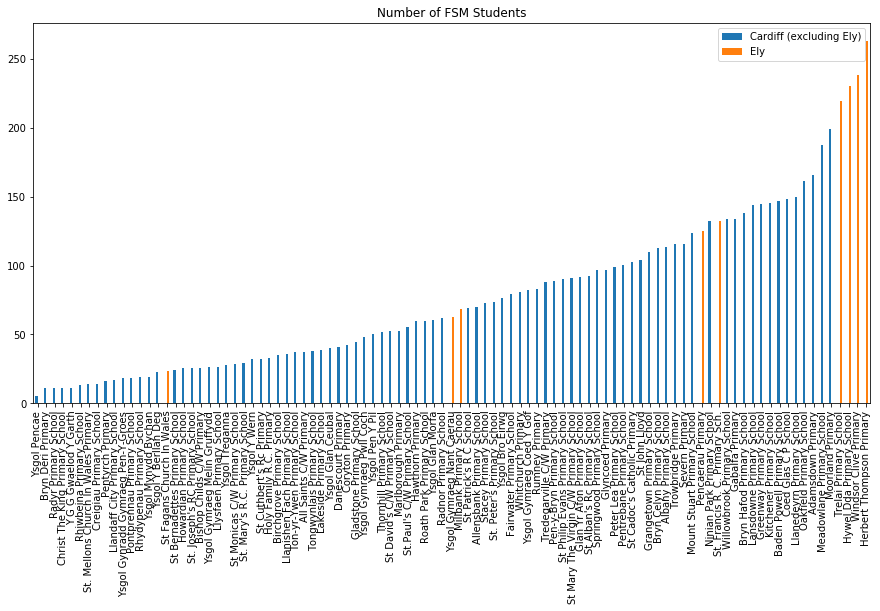

In [50]:
order = cardiff_fsm_students.dropna().sort_values().keys()
local_nonlocal_fsm = pd.concat([cardiff_fsm_students[non_local_school].dropna(),cardiff_fsm_students[local_schools].dropna()],\
                                                                                    axis=1,keys=['Cardiff (excluding Ely)','Ely'])
local_nonlocal_fsm.set_index(cardiff_fsm_students.keys()).loc[order].plot(kind='bar',title="Number of FSM Students",figsize=(15,7))

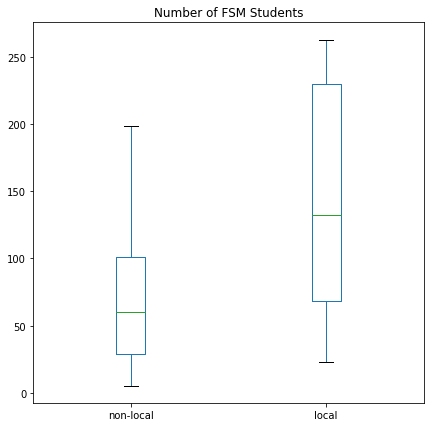

In [22]:
local_nonlocal_fsm.plot(kind='box',title="Number of FSM Students",figsize=(7,7))

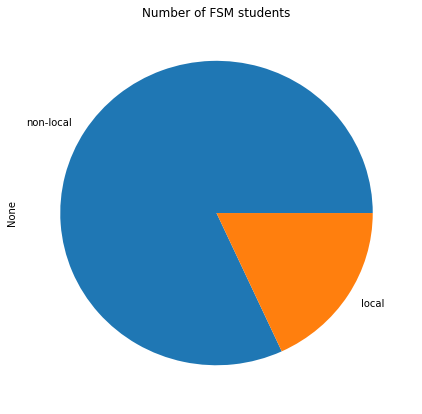

In [23]:
local_nonlocal_fsm.sum().plot(kind='pie',figsize=(7,7),title='Number of FSM students')

In [24]:
local_nonlocal_fsm.sum()/local_nonlocal_fsm.sum().sum()

non-local    0.818568
local        0.181432
dtype: float64

From this we can see that the Ely schools actually have a lot more primary school children on FSM than the average for Cardiff. 

The my local schools website has many other tables we can study to get a more detailed picture of the schools than the summary information we have looked at so far. The function below takes the URL for the schools page and the tableid for the table you want (which you have to get by looking at the source code for the website) and returns the data from that table in a pandas data frame.

In [25]:
def load_table_into_dataFrame(schoolURL,tableid):
    school_pages = requests.get(schoolURL)
    school_soup = BeautifulSoup(school_pages.content, 'html.parser')
    table = school_soup.find_all('table', id=tableid)
    if table == []:
        return []
    columns = [int(table[0].find_all('th')[i].getText().strip()) for i in range(1,len(table[0].find_all('th')))]
    rows = [table[0].find_all('td')[i].getText().strip() \
            for i in range(len(table[0].find_all('td'))) if i%(len(columns)+1)==0]
    table_entries_list = [table[0].find_all('td')[i].getText().strip()\
                      for i in range(len(table[0].find_all('td'))) if i%(len(columns)+1)!=0]
    table_entries = {}
    for i,row in enumerate(rows):
        table_entries[row]={}
        for j,column in enumerate(columns):
            table_entries[row][column] = tofloat(table_entries_list[i*len(columns)+j])
    return pd.DataFrame.from_dict(table_entries,orient='index') 

Below are the tableids for the tables of special educational need (SEN) and English as an additional language (EAL). For information on what these statistics mean, look at the my local schools website.

In [26]:
sen_table_id = 'atbl239'
eal_table_id = 'atbl240'

We now make a dictionary linking each school to its SEN table.

In [27]:
sen_dict = {}
for school in primary_school_URLs.keys():
    sen_dict[school] = load_table_into_dataFrame(primary_school_URLs[school],sen_table_id)
    if not len(sen_dict[school]):
        del sen_dict[school]

Lets focus on the school action statistic. Here we make data frames for all primary schools in Cardiff and from this make another data frame with just the local schools.

In [28]:
school_action_dict = {}
for school in sen_dict.keys():
    school_action_dict[school] = sen_dict[school].loc['School - School Action']
school_action_df = pd.DataFrame.from_dict(school_action_dict,orient='index') 
local_school_action_df = school_action_df.loc[local_schools]

It would be useful to know the total number of SEN students in each school. This data is not directly available, so I multiply the number of students in each school by the percentage of SEN students to get an approximate number.

In [29]:
number_local_sen_students = local_school_df['Number of Pupils 2017']*school_action_df.loc[local_schools,2017]/100
number_cardiff_sen_students = cardiff_primary_school_df['Number of Pupils 2017']*school_action_df.loc[:,2017]/100

Below we plot the number of SEN students at each school in Cardiff. To make the local schools stand out, I made them a different colour from the other schools in Cardiff. To do this I first make a list of non-local Cardiff schools, put the schools in order of number of SEN students, and then make a dataframe that has local and non-local schools in diffent columns. Then when I plot the data, the different columns get different colours. 

In [30]:
non_local_school = [school for school in number_cardiff_sen_students.keys() if school not in local_schools]

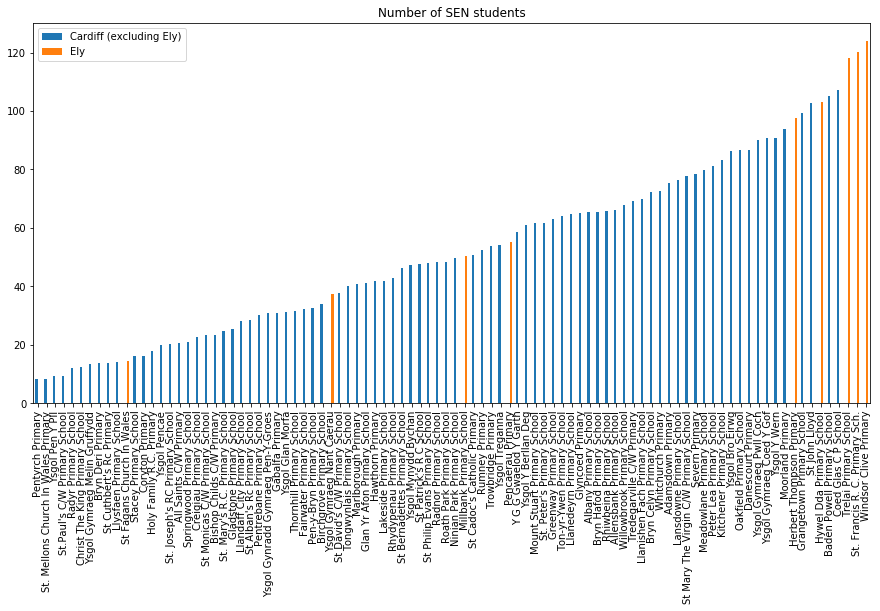

In [52]:
order = number_cardiff_sen_students.dropna().sort_values().keys()
local_nonlocal_sen = pd.concat([number_cardiff_sen_students[non_local_school],number_cardiff_sen_students[local_schools]],\
                                                                                    axis=1,keys=['Cardiff (excluding Ely)','Ely'])
local_nonlocal_sen.set_index(number_cardiff_sen_students.keys()).loc[order].plot(kind='bar',title='Number of SEN students',figsize=(15,7))

A box plot of the SEN student data shows that the median number of SEN students is higher in the Ely area than in Cardiff overall.

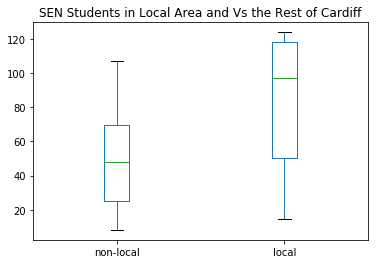

In [32]:
local_nonlocal_sen.plot(kind='box',title='SEN Students in Local Area and Vs the Rest of Cardiff')

Now we will look at the number of students in the local area who speak English as an additional language (EAL). Below we make a dictionary and dataframe of the EAL data for each school, ignoring schools which do not keep data on this. 

In [33]:
eal_dict = {}
for school in primary_school_URLs.keys():
    temp = load_table_into_dataFrame(primary_school_URLs[school],eal_table_id)
    try:
        eal_dict[school] = temp.loc['School']
    except (KeyError, AttributeError):
        continue


In [34]:
eal_df = pd.DataFrame.from_dict(eal_dict,orient='index')

The summary data below suggests the local schools have many more EAL students than is typical for Cardiff.

In [35]:
eal_df.describe()

,2011,2012,2013,2014,2015,2016,2017
count,62.000000,65.000000,67.000000,68.000000,70.000000,69.000000,76.000000
mean,23.882258,24.807692,25.791045,26.358824,27.230000,27.642029,24.205263
std,24.479054,24.028904,24.445175,24.802655,25.622507,25.288258,22.767538
min,1.500000,1.500000,1.500000,2.100000,1.600000,2.400000,2.200000
25%,5.775000,7.500000,7.000000,8.275000,7.575000,8.800000,6.275000
50%,12.700000,14.600000,16.900000,17.350000,17.850000,18.300000,14.700000
75%,37.625000,36.400000,34.850000,36.500000,40.150000,42.900000,34.725000
max,92.500000,91.000000,90.200000,90.700000,92.900000,91.300000,87.800000


In [36]:
eal_df.loc[local_schools].describe()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,2011,2012,2013,2014,2015,2016,2017
count,4.000000,5.000000,5.000000,6.000000,6.000000,6.000000,8.000000
mean,8.375000,7.260000,9.040000,10.900000,12.450000,11.750000,10.250000
std,3.927149,3.442092,4.136786,5.601071,7.997437,8.980367,8.017303
min,4.500000,3.700000,4.100000,5.300000,1.600000,3.000000,2.900000
25%,5.400000,4.700000,6.400000,6.200000,8.600000,4.700000,4.875000
50%,8.100000,7.300000,9.500000,9.800000,11.000000,9.700000,6.650000
75%,11.075000,8.100000,10.200000,15.575000,17.150000,16.800000,14.725000
max,12.800000,12.500000,15.000000,18.000000,24.100000,25.900000,24.800000


As with SEN students, we have to estimate the total number of EAL students ny multiplying the total number of students by the percentage of them that are EAL students. 

In [37]:
num_eal_students_local = (cardiff_primary_school_df['Number of Pupils 2017']*eal_df.loc[:,2017]/100)[local_schools]
num_eal_students_cardiff = (cardiff_primary_school_df['Number of Pupils 2017']*eal_df.loc[:,2017]/100)

Below we make a box plot of this data.

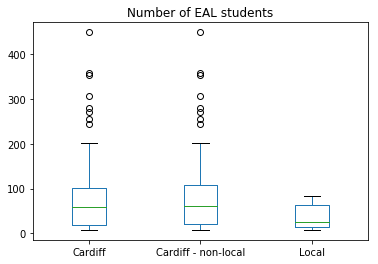

In [38]:
(pd.concat([num_eal_students_cardiff, num_eal_students_cardiff[non_local_school], num_eal_students_local]\
           ,axis=1,keys=['Cardiff','Cardiff - non-local','Local'])).plot(kind='box',title='Number of EAL students')

Of the 12 local schools, 5 are in the top decile for EAL students.

In [39]:
pc90_eal = num_eal_students_cardiff[num_eal_students_cardiff>num_eal_students_cardiff.quantile(q=0.9)].keys()
sum(np.isin(local_schools,pc90_eal))

0

Below is a plot of the number of EAL students in local and non-local schools in the top 90% for EAL students.

In [40]:
local_pc90 = pc90_eal[np.isin(pc90_eal,local_schools)]
non_local_pc90 = pc90_eal[~np.isin(pc90_eal,local_schools)]

In [41]:
pc90_local_nonlocal = pd.concat([num_eal_students_cardiff[non_local_pc90],num_eal_students_cardiff[local_pc90]]\
          ,axis=1,keys=['Non-local','Local'])

In [42]:
pc90_eal_df = num_eal_students_cardiff[pc90_eal]

In [43]:
order = pc90_eal_df.sort_values().keys()

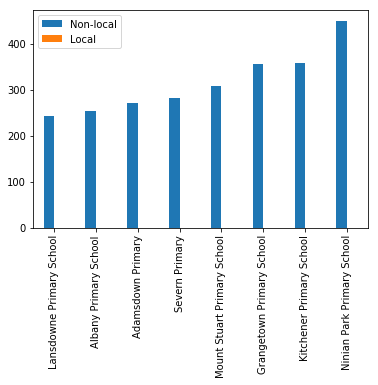

In [44]:
pc90_local_nonlocal.set_index(pc90_eal).loc[order].plot(kind='bar')

And below is a the same plot but for all of Cardiff.

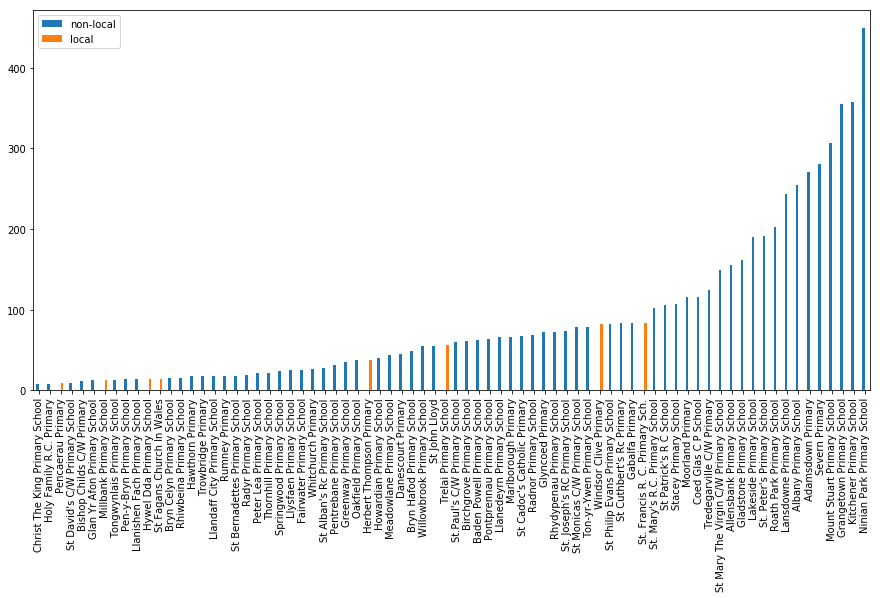

In [45]:
order = num_eal_students_cardiff.dropna().sort_values().keys()

local_nonlocal_eal = pd.concat([num_eal_students_cardiff[non_local_school],num_eal_students_cardiff[local_schools]],\
                                                                                    axis=1,keys=['non-local','local'])
local_nonlocal_eal.set_index(num_eal_students_cardiff.keys()).loc[order].plot(kind='bar',figsize=(15,7))

Below we have two pie charts, one showing the number of EAL students in the local area vs the whole of Cardiff, and the other showing just the number of primary students in the local area vs the whole of Cardiff. It clearly shows EAL students are much more common in the local area.

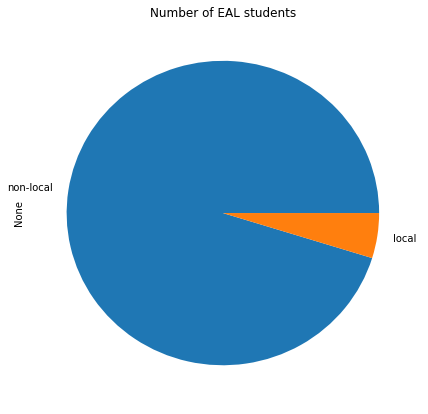

In [46]:
local_nonlocal_eal.sum().plot(kind='pie',figsize=(7,7),title='Number of EAL students')

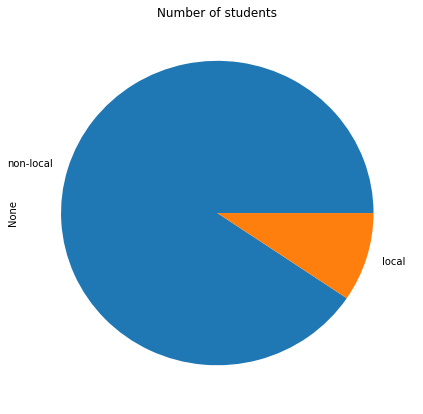

In [47]:
local_nonlocal_students = pd.concat([cardiff_primary_school_df['Number of Pupils 2017'][non_local_school],\
           cardiff_primary_school_df['Number of Pupils 2017'][local_schools]],\
          keys=['non-local','local'], axis=1).sum()
local_nonlocal_students.plot(kind='pie',figsize=(7,7),title='Number of students')

In the local area, about 43% of students are EAL students, as opposed to about 15% for Cardiff as a whole.

In [48]:
local_nonlocal_eal.sum()/local_nonlocal_students

non-local    0.203585
local        0.097868
dtype: float64